![BTS](https://github.com/Juanlu001/bts-mbds-data-science-foundations/blob/master/sessions/img/Logo-BTS.jpg?raw=1)

# Session 5: Text Mining (II)

### Juan Luis Cano Rodríguez <juan.cano@bts.tech> - Data Science Foundations (2018-10-19)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Juanlu001/bts-mbds-data-science-foundations/blob/master/sessions/05-Text-Mining-II.ipynb)

In [0]:
# Source: http://billchambers.me/tutorials/2014/12/21/tf-idf-explained-in-python.html

t0 = "China has a strong economy that is growing at a rapid pace. However politically it differs greatly from the US Economy."
t1 = "At last, China seems serious about confronting an endemic problem: domestic violence and corruption."
t2 = "Japan's prime minister, Shinzo Abe, is working towards healing the economic turmoil in his own country for his view on the future of his people."
t3 = "Vladimir Putin is working hard to fix the economy in Russia as the Ruble has tumbled."
t4 = "What's the future of Abenomics? We asked Shinzo Abe for his views"
t5 = "Obama has eased sanctions on Cuba while accelerating those against the Russian Economy, even as the Ruble's value falls almost daily."
t6 = "Vladimir Putin was found to be riding a horse, again, without a shirt on while hunting deer. Vladimir Putin always seems so serious about things - even riding horses."

## Exercise 2: TF-IDF

1. Write a function `tf` that receives a string and a spaCy `Doc` and returns the number of times the word appears in the `lemmatize`d `Doc`
2. Write a function `idf` that receives a string and a list of spaCy `Doc`s and returns _the inverse of_ the number of docs that contain the word
3. Write a function `tf_idf` that receives a string, a spaCy `Doc` and a list of spaCy `Doc`s and returns the product of `tf(t, d) · idf(t, D)`.
4. Write a function `all_lemmas` that receives a list of `Doc`s and returns a `set` of all available `lemma`s
5. Write a function `tf_idf_doc` that receives a `Doc` and a list of `Doc`s and returns a dictionary of `{lemma: TF-IDF value}`, corresponding to each the lemmas of all the available documents
6. Write a function `tf_idf_scores` that receives a list of `Doc`s and returns a `DataFrame` displaying the lemmas in the columns and the documents in the rows.
7. Visualize the TF-IDF, like this:

![TF-IDF](https://github.com/Juanlu001/bts-mbds-data-science-foundations/blob/master/sessions/img/tf-idf.png?raw=1)

 **1. Write a function tf that receives a string and a spaCy Doc and returns the number of times the word appears in the lemmatized Doc**

* First we must import all relevant libraries.
* I converted all text files to spaCy docs using nlp.
* I defined a **lemmatize** function that receives a spaCy doc and returns all lemmatized words, and excludes punctuation, spaces and stop-words.
* I defined a **tf** function that receives a word and a spaCy doc and a word, lemmatizes the doc using the function defined earlier, and uses .count( ) to count the number of times the word occurs in the lemmatized doc. 







In [7]:
import spacy
import sys
!{sys.executable} -m spacy download en
nlp = spacy.load("en")
from spacy.lang.en.stop_words import STOP_WORDS

    100% |████████████████████████████████| 37.4MB 58.5MB/s 
  Running setup.py install for en-core-web-sm ... - \ | done

    Linking successful
    /usr/local/lib/python3.6/dist-packages/en_core_web_sm -->
    /usr/local/lib/python3.6/dist-packages/spacy/data/en

    You can now load the model via spacy.load('en')



In [0]:
#convert into spaCy docs
doc0 = nlp(t0)
doc1 = nlp(t1)
doc2 = nlp(t2)
doc3 = nlp(t3)
doc4 = nlp(t4)
doc5 = nlp(t5)
doc6 = nlp(t6)

In [9]:
print(doc0)
print(doc1)
print(doc2)
print(doc3)
print(doc4)
print(doc5)
print(doc6)

China has a strong economy that is growing at a rapid pace. However politically it differs greatly from the US Economy.
At last, China seems serious about confronting an endemic problem: domestic violence and corruption.
Japan's prime minister, Shinzo Abe, is working towards healing the economic turmoil in his own country for his view on the future of his people.
Vladimir Putin is working hard to fix the economy in Russia as the Ruble has tumbled.
What's the future of Abenomics? We asked Shinzo Abe for his views
Obama has eased sanctions on Cuba while accelerating those against the Russian Economy, even as the Ruble's value falls almost daily.
Vladimir Putin was found to be riding a horse, again, without a shirt on while hunting deer. Vladimir Putin always seems so serious about things - even riding horses.


In [0]:
def lemmatize(doc):
  return [
      token.lemma_ for token in doc
      if not token.is_punct and not token.is_space and not token.lower_ in STOP_WORDS
  ]

In [11]:
lemmatize(doc6)

['vladimir',
 'putin',
 'find',
 'rid',
 'horse',
 'shirt',
 'hunt',
 'deer',
 'vladimir',
 'putin',
 'thing',
 'rid',
 'horse']

In [0]:
def tf(str, doc):
  
  return lemmatize(doc).count(str)

In [13]:
tf("vladimir", doc6)

2

**2. Write a function idf that receives a string and a list of spaCy Docs and returns the inverse of the number of docs that contain the word**

* The first step is to define docs: our list of strings converted into spaCy docs.
* I defined a function **idf** that receives a word and the list of spaCy docs. The function iterates over every doc in our list of docs, lemmatizes it using the earlier function, and counts how many times the string (lemmatized and joined in case two words are inputed)
* If the count of the word in the doc is greater than 0, 1 is added to our new **count** variable. The function then returns the inverse of the number of docs (1 divided by the count.)
* Note: I have included * if count == 0: return 0 * to avoid the issue of dividing by nothing in future questions.

In [0]:
docs = [nlp(i) for i in (t0, t1, t2, t3, t4, t5, t6)]

In [15]:
len(docs)

7

In [0]:
def idf(str, list):
  count = 0
  
  for doc in list:
    
    if lemmatize(doc).count("".join(lemmatize(nlp(str)))) > 0: 
        count += 1
        
  if count == 0:
    return 0
    
  return 1/count

In [17]:
idf("a horse", docs)

1.0

**3. Write a function tf_idf that receives a string, a spaCy Doc and a list of spaCy Docs and returns the product of tf(t, d) · idf(t, D).**

* This step is simple: calculating the tf_idf requires the tf and idf functions be multipled together. I defined a function **tf_idf** that receives a word, a spaCy doc and a list of spaCy docs, and returns the tf_idf for those inputs.


In [0]:
def tf_idf(str, doc, list):
  
  return tf(str, doc) * idf(str, list)

In [19]:
tf_idf("vladimir", doc6, docs)

1.0

**4. Write a function all_lemmas that receives a list of Docs and returns a set of all available lemmas**

* I defined a function **all_lemmas** that receives a list of spaCy docs. Within this function a new variable **lemmas** is defined as an empty set. This function then iterates over each doc in the list, and will add the lemmas from each doc to the set. The '|=' union formula ensures that only new lemmas are added to the **lemmas** variable for each new doc that the function iterates over. 

In [0]:
def all_lemmas(list):
  
  lemmas = set()
  for doc in docs:
    lemmas |= set(lemmatize(doc))

  return lemmas

In [21]:
all_lemmas(docs)

{"'s",
 'abe',
 'abenomics',
 'accelerate',
 'ask',
 'be',
 'china',
 'confront',
 'corruption',
 'country',
 'cuba',
 'daily',
 'deer',
 'differ',
 'domestic',
 'ease',
 'economic',
 'economy',
 'endemic',
 'fall',
 'find',
 'fix',
 'future',
 'greatly',
 'grow',
 'hard',
 'heal',
 'horse',
 'hunt',
 'japan',
 'minister',
 'obama',
 'pace',
 'people',
 'politically',
 'prime',
 'problem',
 'putin',
 'rapid',
 'rid',
 'ruble',
 'russia',
 'russian',
 'sanction',
 'shinzo',
 'shirt',
 'strong',
 'thing',
 'tumble',
 'turmoil',
 'value',
 'view',
 'violence',
 'vladimir',
 'work'}

**5. Write a function tf_idf_doc that receives a Doc and a list of Docs and returns a dictionary of {lemma: TF-IDF value}, corresponding to each the lemmas of all the available documents**

* I defined a function **tf_idf_doc** that receives a doc and list of docs. Withiin this function an empty dictionary is defined. For each lemma in the set of lemmas of the received list (using the earlier function **all_lemmas**), a new item is added to the dictionary using the lemma as the key and the tf_idf as the value (using the earlier function **tf_idf**).

In [0]:
def tf_idf_doc(doc, list):
  
  dictionary = {}
  
  for lemma in all_lemmas(list):
    dictionary[lemma] = tf_idf(lemma, doc, list)
  
  return dictionary

In [23]:
tf_idf_doc(doc1, docs)

{"'s": 0.0,
 'abe': 0.0,
 'abenomics': 0,
 'accelerate': 0.0,
 'ask': 0.0,
 'be': 0,
 'china': 0.5,
 'confront': 1.0,
 'corruption': 1.0,
 'country': 0.0,
 'cuba': 0.0,
 'daily': 0.0,
 'deer': 0.0,
 'differ': 0.0,
 'domestic': 1.0,
 'ease': 0.0,
 'economic': 0.0,
 'economy': 0.0,
 'endemic': 1.0,
 'fall': 0.0,
 'find': 0.0,
 'fix': 0.0,
 'future': 0.0,
 'greatly': 0.0,
 'grow': 0.0,
 'hard': 0.0,
 'heal': 0.0,
 'horse': 0.0,
 'hunt': 0.0,
 'japan': 0.0,
 'minister': 0.0,
 'obama': 0.0,
 'pace': 0.0,
 'people': 0.0,
 'politically': 0.0,
 'prime': 0.0,
 'problem': 1.0,
 'putin': 0.0,
 'rapid': 0.0,
 'rid': 0.0,
 'ruble': 0.0,
 'russia': 0.0,
 'russian': 0.0,
 'sanction': 0.0,
 'shinzo': 0.0,
 'shirt': 0.0,
 'strong': 0.0,
 'thing': 0.0,
 'tumble': 0.0,
 'turmoil': 0.0,
 'value': 0.0,
 'view': 0.0,
 'violence': 1.0,
 'vladimir': 0.0,
 'work': 0.0}

**6. Write a function tf_idf_scores that receives a list of Docs and returns a DataFrame displaying the lemmas in the columns and the documents in the rows.**

* First we must import pandas to build a dataframe
* I defined a function **tf_idf_scores** that receives a list of spaCy docs. Variable **a** is defined as an empty list. Variable **index** is defined as a list of all the sequential docs in the received list. The function then iterates over the list, and for each doc it will append the dictionary of lemmas (using earlier function **tf_idf_doc**). It then creates a dataframe using the new list **a** for data, and the variable **index** for the index. 

In [0]:
import pandas as pd

def tf_idf_scores(list):

  a = []
  index = [i for i in range(len(list))]
  
  for doc in list:
    a.append(tf_idf_doc(doc, list))
  
  df = pd.DataFrame(data = a, index = index)
  
  return df

In [25]:
tf_idf_scores(docs)

,'s,abe,abenomics,accelerate,ask,be,china,confront,corruption,country,...,shirt,strong,thing,tumble,turmoil,value,view,violence,vladimir,work
0,0.0,0.0,0,0.0,0.0,0,0.5,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0,0.0,0.0,0,0.5,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.5,0,0.0,0.0,0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.5,0.0,0.0,0.5
3,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.5,0.5
4,0.0,0.5,0,0.0,1.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0
5,1.0,0.0,0,1.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


**7. Visualize the TF-IDF, like this:**

* First we have to import seaborn and matplotlib to build visualisations.
* I saved the dataframe into variable **df**.
* Call the seaborn heatmap, using df as the data and setting the limits to  0 and 1.

Note: for some reason my default palette was different to the example. The closest I could find with the Inferno colour palette. 

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
df = tf_idf_scores(docs)

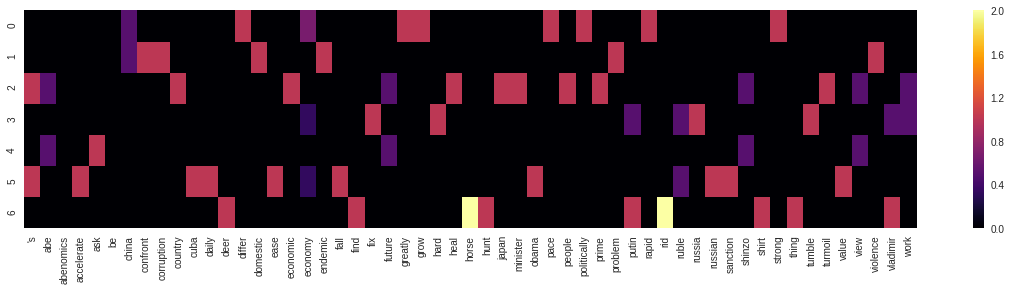

In [28]:
plt.figure(figsize=(20, 4))
sns.heatmap(data = df, cmap = 'inferno')